#### Visualization

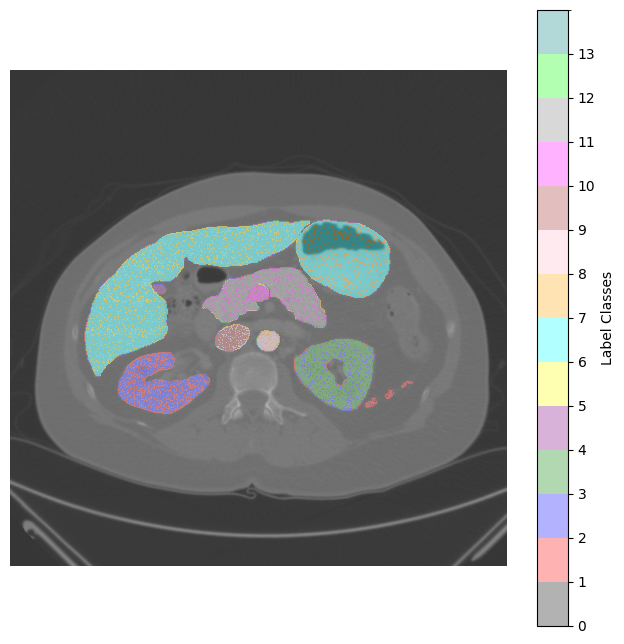

In [12]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Paths to the image and label files
image_file_path = 'data_abdomen/RawData/Training/img/img0040.nii.gz'
label_file_path = 'data_abdomen/RawData/Training/label/label0040.nii.gz'

# Load the image and label NIfTI files
image = nib.load(image_file_path)
label = nib.load(label_file_path)

# Get the data as numpy arrays
image_data = image.get_fdata()
label_data = label.get_fdata()

# Choose a slice to visualize (e.g., middle slice along the z-axis)
slice_index = image_data.shape[2] // 2
image_slice = image_data[:, :, slice_index]
label_slice = label_data[:, :, slice_index]

# Define specific label values and corresponding colors
label_values = list(range(14))  # Label values from 0 to 13
colors = [
    'black', 'red', 'blue', 'green', 'purple', 'yellow', 'cyan', 'orange', 
    'pink', 'brown', 'magenta', 'gray', 'lime', 'teal'
]

# Create a color map for the labels with the specific values
cmap = mcolors.ListedColormap(colors)
bounds = label_values + [max(label_values) + 1]  # Add an upper bound for normalization
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the image slice
plt.figure(figsize=(8, 8))
plt.imshow(image_slice.T, cmap='gray', origin='lower', alpha=0.7)

# Overlay the label slice with the custom colormap and boundaries
plt.imshow(label_slice.T, cmap=cmap, norm=norm, origin='lower', alpha=0.3)

# Add a color bar with custom tick labels for the classes
colorbar = plt.colorbar(ticks=label_values)
colorbar.set_label('Label Classes')

# Remove axis for a cleaner view
plt.axis('off')
plt.show()



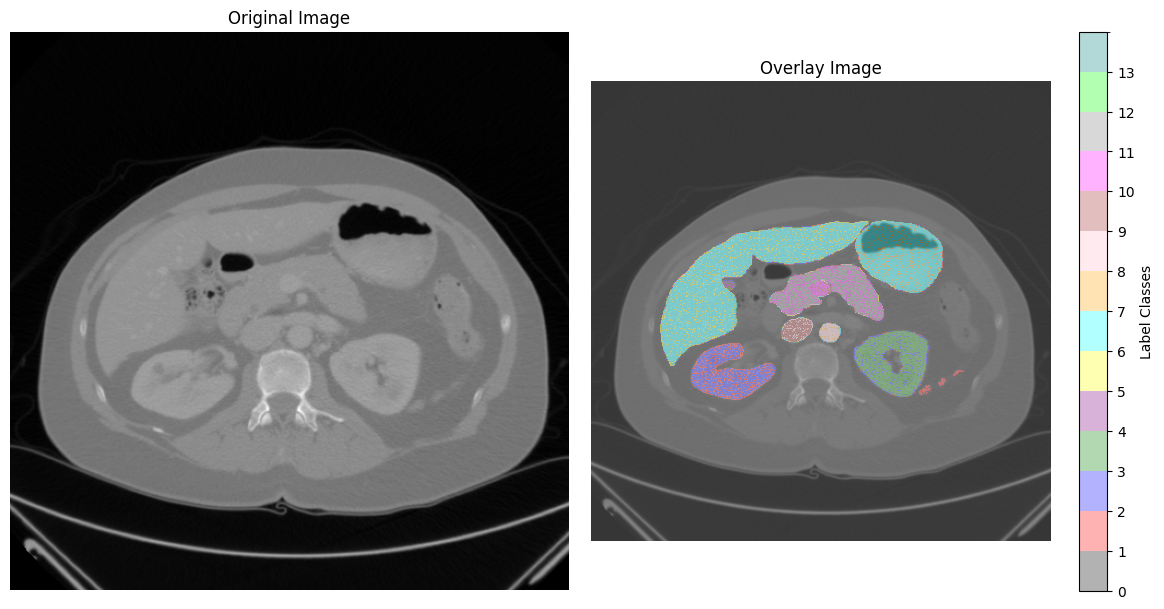

In [13]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Paths to the image and label files
image_file_path = 'data_abdomen/RawData/Training/img/img0040.nii.gz'
label_file_path = 'data_abdomen/RawData/Training/label/label0040.nii.gz'

# Load the image and label NIfTI files
image = nib.load(image_file_path)
label = nib.load(label_file_path)

# Get the data as numpy arrays
image_data = image.get_fdata()
label_data = label.get_fdata()

# Choose a slice to visualize (e.g., middle slice along the z-axis)
slice_index = image_data.shape[2] // 2
image_slice = image_data[:, :, slice_index]
label_slice = label_data[:, :, slice_index]
# label_slice = np.round(label_slice)

# Define specific label values and corresponding colors
label_values = list(range(14))  # Label values from 0 to 13
colors = [
    'black', 'red', 'blue', 'green', 'purple', 'yellow', 'cyan', 'orange', 
    'pink', 'brown', 'magenta', 'gray', 'lime', 'teal'
]

# Create a color map for the labels with the specific values
cmap = mcolors.ListedColormap(colors)
bounds = label_values + [max(label_values) + 1]  # Add an upper bound for normalization
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create a two-panel figure
plt.figure(figsize=(12, 6))

# Plot the original image slice on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(image_slice.T, cmap='gray', origin='lower')
plt.title('Original Image')
plt.axis('off')  # Remove axis for a cleaner view

# Plot the overlay image on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(image_slice.T, cmap='gray', origin='lower', alpha=0.7)
plt.imshow(label_slice.T, cmap=cmap, norm=norm, origin='lower', alpha=0.3)
plt.title('Overlay Image')
colorbar = plt.colorbar(ticks=label_values)
colorbar.set_label('Label Classes')
plt.axis('off')  # Remove axis for a cleaner view

plt.tight_layout()  # Adjust layout
plt.show()


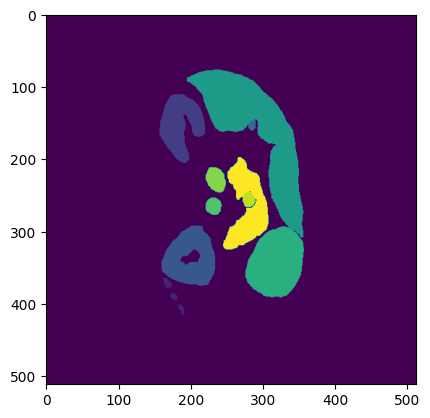

In [11]:
plt.imshow(label_slice)

#### Reorganize folders, bring the nii.gz to the parent directory, make it same format as the cardiac dataset

In [40]:
import os
import shutil

# Define the source directories and the new target directory
img_dir = 'data_abdomen/Training/img'
label_dir = 'data_abdomen/Training/label'
target_dir = 'data_abdomen/ct_raw_data'  # Replace with your desired target directory

# Make sure the target directory exists
os.makedirs(target_dir, exist_ok=True)

# Move all files from img directory to the new target directory
for filename in os.listdir(img_dir):
    source_path = os.path.join(img_dir, filename)
    fileidx = filename.split('.')[0]
    filename_2 = fileidx[-4:] + '_image.nii.gz'
    target_path = os.path.join(target_dir, filename_2)
    # print(target_path)
    shutil.copy(source_path, target_path)

# Move all files from label directory to the new target directory
for filename in os.listdir(label_dir):
    source_path = os.path.join(label_dir, filename)
    fileidx = filename.split('.')[0]
    filename_2 = fileidx[-4:] + '_label.nii.gz'
    target_path = os.path.join(target_dir, filename_2)
    # print(target_path)
    shutil.copy(source_path, target_path)


#### Resize data to same size (256, 256)

In [69]:
import os
import nibabel as nib
import cv2
import numpy as np

# Define the target size for resizing
target_size = (256, 256)  # Update to your preferred dimensions

# Define the input and output directories
input_folder = 'data_abdomen/ct_raw_data'  # Update with the path to your input files
output_folder = 'data_abdomen/ct_resized'  # Update with the path to your output folder

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Function to resize a single 2D slice
def resize_image(image, target_size):
    return cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

# Process each .nii.gz file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.nii.gz'):
        file_path = os.path.join(input_folder, filename)
        
        # Load the NIfTI file
        img = nib.load(file_path)
        img_data = img.get_fdata()
        
        # Array to store resized slices
        resized_data = np.zeros((target_size[0], target_size[1], img_data.shape[2]))
        
        # Resize each slice and add it to the resized array
        for i in range(img_data.shape[2]):
            img_slice = img_data[:, :, i]
            
            # Resize the slice to target size
            resized_slice = resize_image(img_slice, target_size)
            resized_data[:, :, i] = resized_slice
        
        # Save the resized volume as a new NIfTI file in the output folder
        resized_img = nib.Nifti1Image(resized_data, img.affine, img.header)
        output_path = os.path.join(output_folder, filename)
        nib.save(resized_img, output_path)

        print(f"Saved resized file: {output_path}")


Saved resized file: data_abdomen/ct_resized/0024_label.nii.gz
Saved resized file: data_abdomen/ct_resized/0010_label.nii.gz
Saved resized file: data_abdomen/ct_resized/0029_label.nii.gz
Saved resized file: data_abdomen/ct_resized/0040_image.nii.gz
Saved resized file: data_abdomen/ct_resized/0006_label.nii.gz
Saved resized file: data_abdomen/ct_resized/0034_label.nii.gz
Saved resized file: data_abdomen/ct_resized/0023_image.nii.gz
Saved resized file: data_abdomen/ct_resized/0001_label.nii.gz
Saved resized file: data_abdomen/ct_resized/0002_image.nii.gz
Saved resized file: data_abdomen/ct_resized/0004_label.nii.gz
Saved resized file: data_abdomen/ct_resized/0024_image.nii.gz
Saved resized file: data_abdomen/ct_resized/0025_label.nii.gz
Saved resized file: data_abdomen/ct_resized/0031_image.nii.gz
Saved resized file: data_abdomen/ct_resized/0026_image.nii.gz
Saved resized file: data_abdomen/ct_resized/0036_image.nii.gz
Saved resized file: data_abdomen/ct_resized/0032_label.nii.gz
Saved re

In [71]:
## Check image size for all images 

import os

folder_path = 'data_abdomen/ct_resized'
for filename in os.listdir(folder_path):
    img = nib.load(os.path.join(folder_path, filename))

    # Get the data as a numpy array
    img_data = img.get_fdata()

    # Choose a slice to visualize (e.g., the middle slice along the z-axis)
    slice_index = img_data.shape[2] // 2  # Adjust this index as needed
    img_slice = img_data[:, :, slice_index]
    
    assert img_slice.shape == (256,256), img_slice.shape

print('done')
   

done


#### Make the label to only 2 classes

In [86]:
np.unique(np.round(label_data).astype('int'))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [22]:
## info from https://www.synapse.org/Synapse:syn3193805/wiki/217789
# (1) spleen    (spl)
# (2) right kidney  (rkid)
# (3) left kidney   (lkid)
# (4) gallbladder
# (5) esophagus
# (6) liver  (liv)
# (7) stomach
# (8) aorta
# (9) inferior vena cava
# (10) portal vein and splenic vein
# (11) pancreas
# (12) right adrenal gland
# (13) left adrenal gland

# We only need spleen, right kidney, left kidney, liver, follows the paper

In [100]:
import nibabel as nib
import numpy as np
import os

# Directory containing the label files (need to run for ct and mri seperately)
label_dir = 'data_abdomen/ct_raw_data'
output_dir = 'data_abdomen/ct_spl'  # Directory to save processed files

target_value = 1
tolerance = 1e-2

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through all files in the directory
for filename in os.listdir(label_dir):
    if filename.endswith('_label.nii.gz'):  # Process only label files
        file_path = os.path.join(label_dir, filename)
        
        # Load the label file
        label = nib.load(file_path)
        label_data = label.get_fdata()
        
        # Keep only values equal to 820 and set the rest to zero
        binary_label = np.where(np.abs(label_data - target_value) <= tolerance, target_value, 0)
        # Save the modified label as a new NIfTI file in the output directory
        binary_label_img = nib.Nifti1Image(binary_label, label.affine, label.header)
        binary_label_img = binary_label_img
        output_path = os.path.join(output_dir, filename)  # Save with the same name in the new directory
        nib.save(binary_label_img, output_path)
        
        print(f"Processed {filename} and saved to {output_path}")

print("Processing complete for all label files.")


Processed 0024_label.nii.gz and saved to data_abdomen/ct_spl/0024_label.nii.gz
Processed 0010_label.nii.gz and saved to data_abdomen/ct_spl/0010_label.nii.gz
Processed 0029_label.nii.gz and saved to data_abdomen/ct_spl/0029_label.nii.gz
Processed 0006_label.nii.gz and saved to data_abdomen/ct_spl/0006_label.nii.gz
Processed 0034_label.nii.gz and saved to data_abdomen/ct_spl/0034_label.nii.gz
Processed 0001_label.nii.gz and saved to data_abdomen/ct_spl/0001_label.nii.gz
Processed 0004_label.nii.gz and saved to data_abdomen/ct_spl/0004_label.nii.gz
Processed 0025_label.nii.gz and saved to data_abdomen/ct_spl/0025_label.nii.gz
Processed 0032_label.nii.gz and saved to data_abdomen/ct_spl/0032_label.nii.gz
Processed 0023_label.nii.gz and saved to data_abdomen/ct_spl/0023_label.nii.gz
Processed 0038_label.nii.gz and saved to data_abdomen/ct_spl/0038_label.nii.gz
Processed 0035_label.nii.gz and saved to data_abdomen/ct_spl/0035_label.nii.gz
Processed 0033_label.nii.gz and saved to data_abdome

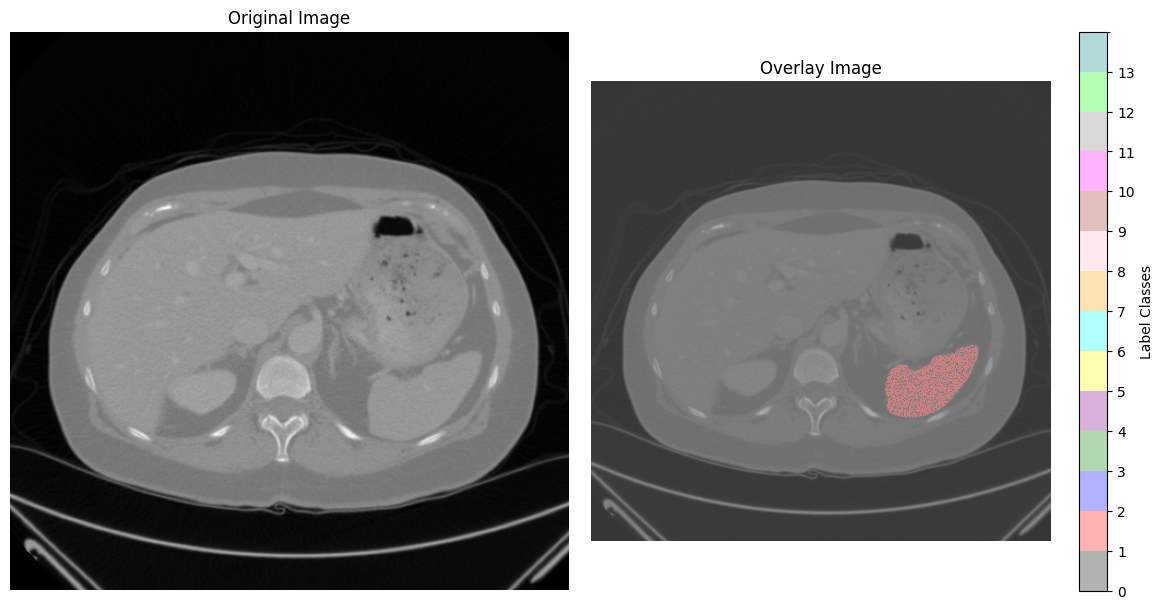

In [102]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Paths to the image and label files
image_file_path = 'data_abdomen/ct_raw_data/0040_image.nii.gz'
label_file_path = 'data_abdomen/ct_spl/0040_label.nii.gz'

# Load the image and label NIfTI files
image = nib.load(image_file_path)
label = nib.load(label_file_path)

# Get the data as numpy arrays
image_data = image.get_fdata()
label_data = label.get_fdata()

# Choose a slice to visualize (e.g., middle slice along the z-axis)
slice_index = image_data.shape[2] // 2
slice_index = 110
image_slice = image_data[:, :, slice_index]
label_slice = label_data[:, :, slice_index]
# label_slice = np.round(label_slice)

# Define specific label values and corresponding colors
label_values = list(range(14))  # Label values from 0 to 13
colors = [
    'black', 'red', 'blue', 'green', 'purple', 'yellow', 'cyan', 'orange', 
    'pink', 'brown', 'magenta', 'gray', 'lime', 'teal'
]

# Create a color map for the labels with the specific values
cmap = mcolors.ListedColormap(colors)
bounds = label_values + [max(label_values) + 1]  # Add an upper bound for normalization
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create a two-panel figure
plt.figure(figsize=(12, 6))

# Plot the original image slice on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(image_slice.T, cmap='gray', origin='lower')
plt.title('Original Image')
plt.axis('off')  # Remove axis for a cleaner view

# Plot the overlay image on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(image_slice.T, cmap='gray', origin='lower', alpha=0.7)
plt.imshow(label_slice.T, cmap=cmap, norm=norm, origin='lower', alpha=0.3)
plt.title('Overlay Image')
colorbar = plt.colorbar(ticks=label_values)
colorbar.set_label('Label Classes')
plt.axis('off')  # Remove axis for a cleaner view

plt.tight_layout()  # Adjust layout
plt.show()
